In [1]:
import wandb
import os
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import scipy
import tree
import json
import glob
fm.fontManager.addfont('../times.ttf')
fm.fontManager.addfont('../times_Italic.ttf')

# from matplotlib import rc
# rc('text',usetex=True)
# rc('text.latex', preamble=r'\usepackage{color}')

plt.rcParams.update({"font.size": 22, "font.family": "Times New Roman"})

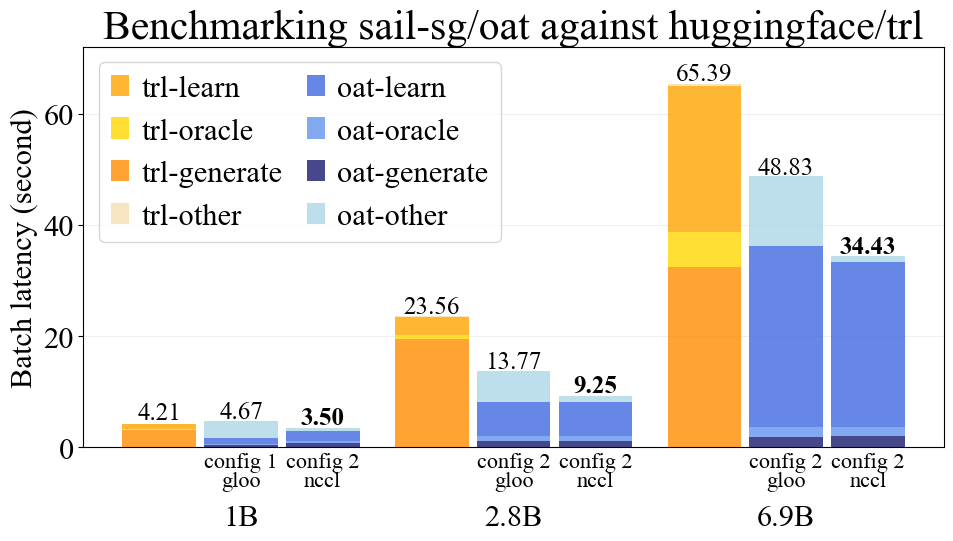

In [2]:
seq_lens = ['1B', '2.8B', '6.9B']
# Hugging Face trl
trl_generation = [3.106, 19.4, 32.348]
trl_rewarding = [0.189, 0.711, 6.335]
trl_learning = [0.871, 3.322, 26.369]
trl_misc = [0.048, 0.131, 0.336]

# oat
# [1b-cfg1-gloo, 1b-cfg2-nccl, 2.8b-cfg2-gloo, 2.8b-cfg2-nccl, 6.9b-cfg2-gloo, 6.9b-cfg2-nccl]
oat_generation = [0.395, 0.789, 1.118, 1.203, 1.866, 2.049]
oat_rewarding = [0.159, 0.333, 0.839, 0.815, 1.681, 1.507]
oat_learning = [1.038, 1.829, 6.116, 6.174, 32.6547, 29.823]
oat_misc = [3.072, 0.548, 5.696, 1.058, 12.6253, 1.046] # gloo


width = 0.3  # The width of the bars

# Plot setup
x_trl = np.array([0 - width, 1 - width, 2 - width])
x_oat = np.array([0, width, 1 , 1 + width, 2, 2 + width])

fig, ax = plt.subplots(figsize=(10, 6))

labels = [
    'trl-generate',
    'trl-oracle',
    'trl-learn',
    'oat-generate',
    'oat-oracle',
    'oat-learn',
]
alpha = 0.8
# trl_bar1 = ax.bar(x - width/2, trl_generation, width-0.03, label=labels[0], color='orange', hatch='/', edgecolor='black')
# oat_bar1 = ax.bar(x + width/2, oat_generation, width-0.03, label=labels[3], color='royalblue', hatch='/', edgecolor='black')

# trl_bar2 = ax.bar(x - width/2, trl_rewarding, width-0.03, bottom=trl_generation, label=labels[1], color='orange', hatch='.', edgecolor='black')
# oat_bar2 = ax.bar(x + width/2, oat_rewarding, width-0.03, bottom=oat_generation, label=labels[4], color='royalblue', hatch='.', edgecolor='black')

# trl_bar3 = ax.bar(x - width/2, trl_learning, width-0.03, bottom=np.array(trl_generation) + np.array(trl_rewarding), label=labels[2], color='orange', hatch='||', edgecolor='black')
# oat_bar3 = ax.bar(x + width/2, oat_learning, width-0.03, bottom=np.array(oat_generation) + np.array(oat_rewarding), label=labels[5], color='royalblue', hatch='||', edgecolor='black')

trl_bar3 = ax.bar(x_trl, trl_learning, width-0.03, bottom=np.array(trl_generation) + np.array(trl_rewarding), label=labels[2], color='orange',alpha=alpha)
trl_bar2 = ax.bar(x_trl, trl_rewarding, width-0.03, bottom=trl_generation, label=labels[1], color='gold', alpha=alpha)
trl_bar1 = ax.bar(x_trl, trl_generation, width-0.03, label=labels[0], color='darkorange' , alpha=alpha)
trl_bar4 = ax.bar(x_trl, trl_misc, width-0.03, bottom=np.array(trl_generation) + np.array(trl_rewarding) + np.array(trl_learning), label="trl-other", color='wheat' , alpha=alpha)


oat_bar3 = ax.bar(x_oat, oat_learning, width-0.03, bottom=np.array(oat_generation) + np.array(oat_rewarding), label=labels[5], color='royalblue',alpha=alpha)
oat_bar2 = ax.bar(x_oat, oat_rewarding, width-0.03, bottom=oat_generation, label=labels[4], color='cornflowerblue',alpha=alpha)
oat_bar1 = ax.bar(x_oat, oat_generation, width-0.03, label=labels[3], color='midnightblue', alpha=alpha)
oat_bar4 = ax.bar(x_oat, oat_misc, width-0.03, bottom=np.array(oat_generation) + np.array(oat_rewarding) + np.array(oat_learning), label="oat-other", color='lightblue', alpha=alpha)


# Add "OOM" text where memory is zero for Hugging Face
# for i, (p, a, o) in enumerate(zip(trl_generation, trl_rewarding, trl_learning)):
#     if p == 0 and a == 0 and o == 0:
#         ax.text((i - width/2) * scaling, 10, "OOM", ha='center', color='orange', fontweight='bold', fontsize=20)

# ax.text((1+width/2) * scaling, 53, r"11$\times$", ha='center', color='black', fontweight='bold', fontsize=20)
# ax.text((3+width/2) * scaling, 87, r"10$\times$", ha='center', color='black', fontweight='bold', fontsize=20)

# Labels, title, and custom x-axis tick labels, etc.
# ax.set_xlabel('Pythia model scales', fontsize=26)
# ax.xaxis.set_label_coords(0.5, -0.2)
ax.set_ylabel('Batch latency (second)', fontsize=22)
ax.set_title('Benchmarking sail-sg/oat against huggingface/trl', fontsize=30)
ax.set_xticks([])
ax.set_yticks(list(range(0, 50, 800)))
ax.set_ylim(0, 72)
# ax.set_xticklabels(seq_lens, fontsize=22)


ax.text(0, -3.5, "config 1", ha='center', color='black', fontsize=16)
ax.text(0, -7, "gloo", ha='center', color='black', fontsize=16)
ax.text(width, -3.5, "config 2", ha='center', color='black', fontsize=16)
ax.text(width, -7, "nccl", ha='center', color='black', fontsize=16)

ax.text(1, -3.5, "config 2", ha='center', color='black', fontsize=16)
ax.text(1, -7, "gloo", ha='center', color='black', fontsize=16)
ax.text(1+width, -3.5, "config 2", ha='center', color='black', fontsize=16)
ax.text(1+width, -7, "nccl", ha='center', color='black', fontsize=16)

ax.text(2, -3.5, "config 2", ha='center', color='black', fontsize=16)
ax.text(2, -7, "gloo", ha='center', color='black', fontsize=16)
ax.text(2+width, -3.5, "config 2", ha='center', color='black', fontsize=16)
ax.text(2+width, -7, "nccl", ha='center', color='black', fontsize=16)



ax.text(0, -14, "1B", ha='center', color='black', fontsize=22)
ax.text(1, -14, "2.8B", ha='center', color='black', fontsize=22)
ax.text(2, -14, "6.9B", ha='center', color='black', fontsize=22)

ax.legend()

sns.move_legend(
        ax, "upper left",
        # bbox_to_anchor=(-0.01, 0.95), 
        ncol=2, 
        title=None, 
        frameon=True,
        # orders=[labels[i] for i in [0, 3, 1, 4, 2, 5]],
        handletextpad=0.4,
        handlelength=0.6,
        columnspacing=0.8
    )
plt.yscale("linear")
ax.grid(axis='y', alpha=0.2)
ax.set(axisbelow=True)
plt.tight_layout()

ax.text(0-width, 5, "4.21", ha='center', color='black', fontsize=18)
ax.text(0, 5.3, "4.67", ha='center', color='black', fontsize=18)
ax.text(0+width, 4.2, "3.50", ha='center', color='black', fontweight="bold",fontsize=18)

ax.text(1-width, 24.2, "23.56", ha='center', color='black', fontsize=18)
ax.text(1, 14.2, "13.77", ha='center', color='black', fontsize=18)
ax.text(1+width, 10, "9.25", ha='center', color='black', fontweight="bold", fontsize=18)

ax.text(2-width, 66, "65.39", ha='center', color='black', fontsize=18)
ax.text(2, 49.2, "48.83", ha='center', color='black', fontsize=18)
ax.text(2+width, 35, "34.43", ha='center', color='black', fontweight="bold", fontsize=18)

plt.show()
fig.savefig("bench_results.png", bbox_inches="tight", dpi=200)